In [1]:
import pandas, urllib, numpy

In [2]:
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [4]:
# pip install git+https://github.com/Maayanlab/maayanlab-bioinformatics.git
import maayanlab_bioinformatics, maayanlab_bioinformatics.enrichment

# read info

In [5]:
gene_list = ['ENDOG', 'BAD', 'C20ORF27', 'GATAD2A', 'HPCAL1', 'LNPEP', 'EML1', 'PRKAB2', 'SCAMP1', 'SCAMP3', 'DDX39A', 'PSMC6', 'SCD', 'DDX39B', 'XPNPEP1', 'PSMC4', 'CLNS1A', 'SERBP1', 'ETHE1', 'PSMC1', 'RBCK1', 'CIAPIN1', 'MYL9', 'MT-ND5', 'NLRX1', 'SAMD9', 'POMP', 'MT-CO2', 'EWSR1', 'MT-ND3', 'MT-ND4', 'SDAD1', 'TMEM70', 'PRKAA1', 'PSMD9', 'DPYSL2', 'KRTCAP2', 'LACTB', 'DPYSL3', 'AKT3', 'PSMD3', 'PSMD4', 'PSMD2', 'VTI1A', 'AP2S1', 'GBP1', 'SNCA', 'ATG3', 'SIGMAR1', 'GSTK1', 'ATP6AP1', 'ACTL6A', 'TMA7', 'SNF8', 'VPS37B', 'TBL3', 'VAMP8', 'TBL2', 'PRXL2A', 'PLSCR4', 'NMT2', 'SFXN3', 'VAMP3', 'NMT1', 'SLC4A1AP', 'HACD2', 'TTYH3', 'GMFG', 'SDR39U1', 'HACD3', 'PPFIBP1', 'LIPA', 'MRPL11', 'AAAS', 'MRPL12', 'C3', 'MRPL20', 'C12ORF57', 'MRPL21', 'NTMT1', 'TBK1', 'RAVER1', 'EPB41L2', 'PRKAR2B', 'EPB41L3', 'PRKAR2A', 'NAPRT', 'PRKACB', 'ATG7', 'PRKACA', 'NSUN2', 'SRP9', 'LYPLA2', 'JUN', 'MYOF', 'FN1', 'MRPL27', 'FAHD2A', 'CS', 'SUMF2', 'MMP14', 'COL3A1', 'TMEM33', 'LYRM7', 'CCDC6', 'UBAP2', 'C5ORF51', 'PAFAH1B2', 'ARF4', 'FLII', 'ZC3HAV1', 'ACAT1', 'MRPL37', 'MRPL38', 'CTCF', 'PQBP1', 'LRSAM1', 'SHB', 'HSPB11', 'ACAT2', 'TRMT112', 'AACS', 'ATIC', 'MRPL41', 'ATXN2', 'CASP10', 'NELFCD', 'SH3BGRL3', 'STAP2', 'TCP11L1', 'DLGAP4', 'RPS27A', 'PCMTD1', 'PACSIN1', 'GATD1', 'DYNLL1', 'PGAM1', 'STAT2', 'GSTO1', 'ACOT13', 'BGN', 'CNPY3', 'MRPL49', 'MRPL46', 'DYNLL2', 'F5', 'MRPL44', 'ARCN1', 'MRPL45', 'DAB2IP', 'PSMA6', 'DDB1', 'PSMA7', 'NUDT21', 'FABP4', 'PSMA5', 'FABP5', 'SNX17', 'MRPL50', 'PSMA3', 'ADAM15', 'SLC39A10', 'TAOK2', 'APEX1', 'PKN1', 'PTRH2', 'SLC29A1', 'ARF6', 'FH', 'MTMR10', 'HEXA', 'RPLP0', 'RPLP2', 'ATL3', 'SNX12', 'OVCA2', 'EEA1', 'FADS3', 'PSMB5', 'NSDHL', 'PSMB1', 'CEPT1', 'IKBKG', 'ENOPH1', 'SRSF11', 'PTPN1', 'SEC24C', 'EIF1AX', 'STX8', 'FAM118B', 'LRCH1', 'HAT1', 'UQCRQ', 'MSH6', 'PDCD5', 'SRSF3', 'ARL8A', 'PDCD4', 'CRAT', 'ROCK1', 'ROCK2', 'PDCD6', 'SRSF2', 'DLST', 'NTPCR', 'HIKESHI', 'EGFR', 'APEH', 'SLK', 'RUVBL1', 'NRAS', 'SH3BP4', 'RUVBL2', 'STX6', 'CSE1L', 'SH3BP5', 'STX5', 'STX4', 'MAP3K7', 'C11ORF68', 'KPNA4', 'KPNA1', 'KPNA2', 'NOP16', 'GOT2', 'GOT1', 'GGCT', 'MYD88', 'DDOST', 'FRMD6', 'RGCC', 'STK24', 'NIT1', 'MED20', 'ARPC3', 'MED22', 'CDC42EP4', 'PEF1', 'ADSS2', 'BMP2K', 'FTL', 'PIN1', 'LRRC59', 'LRRC57', 'ARHGAP9', 'UQCRB', 'EIF4EBP1', 'ARL2', 'ARL3', 'UBFD1', 'ARL1', 'FBXO22', 'HYI', 'HNRNPDL', 'TMEM167A', 'NELFB', 'CERT1', 'EDIL3', 'EIF5B', 'CYB5B', 'FUS', 'VBP1', 'ITGA3', 'ITGA2', 'NEMF', 'RABGGTB', 'AHSA1', 'TMBIM1', 'PIK3CB', 'ITGAE', 'PSMG4', 'DCTPP1', 'PSMG3', 'DSG4', 'MT-CYB', 'KHDRBS1', 'MIPEP', 'NDUFB9', 'AARS2', 'CRYBG2', 'SAR1B', 'FBLIM1', 'CELF1', 'NDUFB4', 'NDUFB3', 'SPATA5', 'BICD1', 'PPWD1', 'GTF3C1', 'ALAD', 'ZNRD2', 'PMVK', 'FCHO2', 'SPR', 'ME2', 'COX4I1', 'ME1', 'EIF4H', 'ACP1', 'EIF4E', 'CTNNBL1', 'PPP1R14B', 'NDUFA8', 'MMAB', 'NDUFA5', 'NDUFA4', 'ERAP1', 'RNASET2', 'MYO10', 'NDUFA3', 'VPS33A', 'EXOG', 'TPD52L2', 'ATOX1', 'MYO1E', 'NA', 'MYO1C', 'NAGK', 'MYO1D', 'MCM3AP', 'SUCLA2', 'EIF3L', 'ATXN10', 'MYO1B', 'EIF3J', 'QTRT1', 'EIF3K', 'P4HB', 'OCIAD2', 'OCIAD1', 'SLC25A11', 'KDELR3', 'KCTD12', 'SLC25A5', 'EIF3E', 'GAPDH', 'EIF3B', 'MTCH1', 'ITGB1', 'PRPS2', 'SRC', 'HSP90AB1', 'AKAP8L', 'FHL1', 'ITGB3', 'FHL2', 'ETFA', 'ETFB', 'U2AF2', 'HSD17B11', 'HSD17B10', 'GANAB', 'SUMO2', 'MIEN1', 'SUMO3', 'PGLS', 'IGF2BP2', 'TRIM25', 'UBQLN1', 'ITGAV', 'FYN', 'MMAA', 'TRIM28', 'UPP1', 'SLC25A24', 'TRIM21', 'EIF2D', 'UBQLN4', 'HNRNPA0', 'H2AZ2', 'SSB', 'PEX19', 'SMARCA1', 'ACTN4', 'CNBP', 'PPA1', 'DHX40', 'GSTZ1', 'SUB1', 'KIF20B', 'FHIP2A', 'EPHA2', 'RETREG2', 'RIN1', 'CALM1', 'TMEM87A', 'PRCC', 'TAGLN', 'STX10', 'STX12', 'CCAR2', 'PSMB10', 'BSG', 'IFI16', 'SNRPD2', 'CDC26', 'KDR', 'CPNE3', 'CCN2', 'RAB11FIP5', 'EXOSC1', 'XRCC6', 'INTS4', 'XRCC4', 'MIF', 'RAB27A', 'MYO5B', 'ERAL1', 'COMMD1', 'COMMD6', 'AIMP2', 'MSRA', 'AIMP1', 'EPRS1', 'RPL27A', 'GORASP2', 'NDUFAF3', 'TAGLN3', 'PPP1R21', 'DHX29', 'GCDH', 'ATP6V1B2', 'PPP1R18', 'ECI1', 'PPP1R11', 'ECI2', 'NUMA1', 'MTFR1L', 'TXNDC12', 'PCBP1', 'PTTG1IP', 'MRPL1', 'TXNDC17', 'TMPO', 'APOO', 'LGALS3', 'C7ORF50', 'COMMD9', 'NUDCD3', 'LGALS1', 'PCBP2', 'RCC1', 'SEC31A', 'DECR1', 'CTSB', 'ACAD9', 'NCOA7', 'UBE2G2', 'MRPS7', 'RAP2B', 'PTPRA', 'KXD1', 'DOT1L', 'MRPS16', 'COX7C', 'TMED10', 'MRPS17', 'KIF11', 'PTPRR', 'INTS11', 'PAK1IP1', 'CTSZ', 'AATK', 'PPCS', 'GPAA1', 'PTPRK', 'TFB1M', 'RCC1L', 'TOR1AIP2', 'TOR1AIP1', 'ACACA', 'MAP1LC3A', 'RAP1A', 'SNX2', 'RAP1B', 'SEC14L2', 'SNX3', 'MAP1LC3B', 'STK38', 'STK39', 'SNX8', 'SNX6', 'ATP6V1G1', 'CAP1', 'CCT3', 'MRPS27', 'SPRYD4', 'MRPS25', 'MME', 'SPRYD7', 'RFTN1', 'AKR1C2', 'GAA', 'MRPS21', 'RPA2', 'TTC1', 'MYO9B', 'APRT', 'GAK', 'HNRNPUL1', 'NDUFAB1', 'KCNQ5', 'HDGF', 'CARS1', 'CD63', 'COX5A', 'GBA', 'AKR1B1', 'SLC43A2', 'DERL2', 'AP2A1', 'CAPG', 'PTMS', 'PEPD', 'COX5B', 'NUDT4', 'MT-ATP6', 'SAMM50', 'PCM1', 'ACADM', 'FHIP1B', 'HEATR3', 'FAM3C', 'UFD1', 'SPTAN1', 'CCT8', 'MARCHF5', 'CCT5', 'MMGT1', 'CAVIN1', 'CAVIN2', 'UBE2C', 'UBE2F', 'ATAD3A', 'CYRIA', 'PDAP1', 'UBE2B', 'VCAM1', 'SDHC', 'PPIA', 'TMX3', 'TMX1', 'DNAJB11', 'WDFY1', 'SBDS', 'PPIH', 'AMOTL2', 'PPIC', 'COX20', 'INPP1', 'DBR1', 'GIMAP1', 'NAPA', 'WASHC2C', 'IBA57', 'PEBP1', 'PRKX', 'GIMAP7', 'NAPG', 'NDRG1', 'TIMM50', 'PCNP', 'CCND1', 'BANF1', 'OSTF1', 'NDUFV2', 'NIBAN2', 'SLC30A7', 'CCDC134', 'MGAM', 'TCAF2', 'VTA1', 'PRNP', 'DSTN', 'DDX52', 'ISG15', 'SUPT5H', 'DARS2', 'DARS1', 'LSM14A', 'ADGRF5', 'OSTC', 'GNB2', 'UBE2R2', 'GEMIN5', 'STT3B', 'UBA3', 'UBA2', 'TCF4', 'LSM14B', 'IFT27', 'BLVRB', 'VCL', 'DDX6', 'SLC41A3', 'TACO1', 'GXYLT1', 'SRP14', 'CNN3', 'EEF1B2', 'CNN2', 'CCNB1', 'KIF3B', 'CHAMP1', 'SH3GL1', 'ACAA1', 'CD99', 'MKKS', 'GALNT7', 'NCBP2', 'NCBP3', 'GGH', 'NAA35', 'CAV1', 'HMGA2', 'ABHD14B', 'LAMB2', 'GALK1', 'CLCN7', 'H2BC15', 'RCN2', 'CLCN6', 'RCN3', 'SFPQ', 'ACOX2', 'NDUFS6', 'NDUFS4', 'NDUFS3', 'ATG4B', 'NDUFS2', 'NDUFS1', 'PSMD11', 'PSMD13', 'GSK3B', 'DDX3X', 'NAA20', 'PSMD12', 'YWHAE', 'DIABLO', 'DDX47', 'YWHAB', 'UBA6', 'ILK', 'UBA5', 'PIK3R4', 'HMGB2', 'DDX42', 'ADAR', 'CHD2', 'AGPAT3', 'PLD3', 'SEPTIN11', 'AGPAT5', 'CA2', 'PDLIM4', 'LASP1', 'PDLIM3', 'LLPH', 'TMEM205', 'NUP43', 'UBE2Q1', 'ISOC2', 'CCDC186', 'RBM14', 'PDLIM7', 'TBP', 'RBM39', 'FAHD1', 'TIMM8B', 'TAF15', 'HSDL2', 'DDX17', 'GLRX5', 'RRM1', 'NAA10', 'DDX10', 'SSRP1', 'FNDC3B', 'SOD1', 'IRGQ', 'GLB1', 'PLA2G15', 'GALE', 'GOLPH3', 'UFM1', 'CAT', 'SLIRP', 'NAA15', 'MVD', 'PTX3', 'FAM98B', 'GALM', 'SNTB2', 'SCARB2', 'CFAP20', 'PRKCSH', 'DCTN2', 'GOSR2', 'EMC10', 'USE1', 'CLN5', 'HMGCL', 'EVA1B', 'MAT2A', 'EPS8L2', 'DIP2A', 'SMNDC1', 'ACOT9', 'HOMER3', 'RPL24', 'NUP214', 'AFAP1', 'SYTL4', 'DKK3', 'GTPBP4', 'DYNC1LI1', 'ARMC6', 'WDR82', 'SARNP', 'FDX1', 'VIM', 'CYP20A1', 'NHLRC2', 'RPL27', 'CDK13', 'ACOT7', 'VPS29', 'RAN', 'VPS28', 'PARG', 'CYFIP2', 'RALB', 'PRSS1', 'RALA', 'AHNAK', 'THYN1', 'RPL13', 'RPL12', 'HNRNPU', 'ARPC5L', 'GLS', 'PCMT1', 'FAM120A', 'NUP85', 'FLRT2', 'ABI3BP', 'RPL15', 'MVB12A', 'RPL14', 'S100A16', 'RPL17', 'S100A10', 'NCSTN', 'NAA50', 'PHC2', 'PRKCD', 'RMDN3', 'RMDN1', 'GPN3', 'HCG_2043426', 'COPZ2', 'PRRC2B', 'COPZ1', 'BIN1', 'H2AC21', 'HPRT1', 'CFI', 'CTBP1', 'PRKDC', 'GNS', 'ATXN7L3B', 'RPL9', 'ARPP19', 'VPS26A', 'RPL7', 'RPL8', 'EPS8', 'PRDX4', 'GCSH', 'ADH5', 'PRDX3', 'PRDX6', 'GJA1', 'PRDX5', 'STMN1', 'NUP62', 'HMOX1', 'RPL38', 'JUNB', 'NUDC', 'ANXA1', 'TPI1', 'SSR3', 'ANXA6', 'SEC16A', 'TCP1', 'TRMT5', 'GNL1', 'TTC9C', 'CDC7', 'FAM126A', 'LRPPRC', 'GLUD1', 'ZEB1', 'FAM210B', 'TMSB15B', 'VEPH1', 'PLEKHM1', 'WDR26', 'RPN2', 'ARPC1B', 'CLTC', 'ENDOD1', 'TIMM10', 'MTDH', 'GLG1', 'ERMP1', 'DHRSX', 'TRIM5', 'CSRP1', 'PNPO', 'EMD', 'RPS15A', 'SERPINB1', 'SQOR', 'KTN1', 'LAPTM5', 'SEPTIN7', 'SRP68', 'MZT1', 'SERPINB6', 'DHRS4', 'SEPTIN8', 'SEPTIN9', 'SCAF4', 'FIG4', 'RNF126', 'CLIP1', 'EBNA1BP2', 'COL4A2', 'HADHA', 'HCLS1', 'PLP2', 'NUCB2', 'PLIN3', 'PLEKHO2', 'ENG', 'LAMTOR5', 'SF3A1', 'TIMM9', 'XXYLT1', 'ATP5MF-PTCD1', 'TGFB1I1', 'NDUFA13', 'NDUFA11', 'CLINT1', 'PIP4P1', 'TMSB4X', 'LMAN2', 'FCGRT', 'ANXA7', 'PBDC1', 'ELOC', 'RIOK3', 'RACK1', 'GSN', 'UVRAG', 'RARS1', 'PPIL2', 'USP7', 'RPS8', 'USP5', 'YIPF5', 'TPM3', 'RPS6', 'TAP1', 'MOB3A', 'YIF1A', 'PPP1CB', 'NRBP1', 'MADD', 'COPS5', 'RAB34', 'SNRPA', 'CNOT7', 'COPS6', 'COPS3', 'CNOT3', 'FKBP8', 'ADAM9', 'STAMBP', 'MRE11', 'FKBP5', 'SNRPE', 'COPS8', 'CNIH4', 'SNRPC', 'DGKH', 'RAB1A', 'POGLUT3', 'RNMT', 'PLXND1', 'PRORP', 'PARK7', 'AUP1', 'PAPSS1', 'BZW2', 'ARMCX1', 'GTF2E2', 'BZW1', 'MACROH2A1', 'PYCARD', 'RAB23', 'TUBB6', 'LAMP2', 'CLCC1', 'CFL2', 'CFL1', 'MACROD1', 'RPS5', 'RPS3', 'DTD1', 'TXNL4A', 'MPDU1', 'TRAPPC4', 'EIF2B3', 'TMEM132A', 'GLMP', 'AIP', 'M6PR', 'GFAP', 'LSM4', 'DUSP23', 'FRMD4A', 'REEP5', 'NCL', 'EIF4G1', 'PGP', 'PDCL', 'ERH', 'PCYOX1', 'RAB5B', 'SYAP1', 'NOTCH3', 'RAB3B', 'CD151', 'CBFB', 'METTL2B', 'AK1', 'CUL3', 'AK2', 'CUL2', 'AK3', 'LARP1B', 'IPO5', 'EDC3', 'NPEPPS', 'ABHD11', 'ESD', 'ABHD10', 'GYG1', 'RAB4A', 'EIF2B1', 'PLS3', 'GPX1', 'REXO2', 'RFC2', 'RFC3', 'TXNRD1', 'PA2G4', 'EDF1', 'CDC42BPB', 'NIPSNAP1', 'PPP5C', 'SARS1', 'DAB2', 'DNAJC1', 'DNAJC8', 'CDK4', 'RPL37A', 'MCM4', 'CDK1', 'MCM5', 'MCM7', 'DNAJC9', 'SFT2D2', 'MCM2', 'GTF2A1', 'ENY2', 'FECH', 'VPS4A', 'ITPR2', 'MRI1', 'UBR5', 'CBWD1', 'UFSP2', 'H1-10', 'PTBP1', 'RIC8A', 'RAD21', 'TNPO1', 'PSAP', 'RPL36A', 'WASF2', 'COA6', 'CPT1A', 'ASCC1', 'ADSL', 'KRR1', 'RPL35A', 'BOLA2', 'LEMD3', 'RAD50', 'RANGAP1', 'PKM', 'RAB12', 'PFKL', 'TST', 'IMPDH2', 'DAD1', 'POLR1C', 'RAB14', 'DNAJA3', 'RAB19', 'CRK', 'ALDH9A1', 'NECTIN2', 'PFKP', 'BET1', 'TSSC4', 'SEC11A', 'HDAC1', 'WDR3', 'HDAC2', 'KIAA1671', 'RPL10A', 'BPHL', 'SART1', 'HECTD1', 'SCRN2', 'AP1G2', 'POLR2G', 'POLR2H', 'VPS35', 'CSK', 'RPL7A', 'CCDC51', 'ILKAP', 'UGGT1', 'VPS39', 'POLR2M', 'CD320', 'KNL1', 'IFRD2', 'RECQL', 'PPP2R1A', 'KRT7', 'ACSL5', 'MEMO1', 'PML', 'SRRM2', 'CCT6A', 'NIF3L1', 'RRAGA', 'RRAGC', 'PFN2', 'PFN1', 'MTPN', 'APP', 'STXBP1', 'PANK4', 'ATP6V0D1', 'STXBP3', 'PDHB', 'AKAP9', 'UQCR10', 'UQCR11', 'ANTXR2', 'CARHSP1', 'TRMT2A', 'TIAL1', 'SEPHS1', 'MCRIP1', 'UBAP2L', 'AAMDC', 'DENR', 'SHOC2', 'FIS1', 'ZRANB2', 'TMED9', 'HLA-C', 'HLA-A', 'ACADSB', 'HLA-B', 'MIF4GD', 'ARFGAP3', 'SRPK2', 'ALDH7A1', 'NCEH1', 'RPS28', 'SMTN', 'CYP2S1', 'TTLL12', 'RPS21', 'RPS23', 'CUTA', 'ISCA2', 'SPARC', 'ANP32B', 'ANP32A', 'PITPNB', 'PITPNA', 'TXN', 'LMAN2L', 'NLN', 'RPS18', 'PTDSS2', 'NFU1', 'H4C1', 'ARL6IP5', 'TREX1', 'TP53BP2', 'RPS12', 'SYNPO', 'RHOA', 'TSC22D4', 'UBL4A', 'NME3', 'KRT14', 'PDCD1LG2', 'AP3B2', 'RHOG', 'AP3B1', 'TYK2', 'RENBP', 'KRT10', 'GNG12', 'NME1', 'RHOC', 'FUBP1', 'CLDN11', 'UGDH', 'KRT19', 'NFX1', 'KRT18', 'R3HCC1', 'COPG1', 'ALDOA', 'RAB7A', 'COL18A1', 'TOP2B', 'ATP5ME', 'RAB5C', 'DAZAP1', 'TRAM1', 'CLIC4', 'DTYMK', 'SLC35F6', 'STRAP', 'TWF2', 'NMD3', 'TWF1', 'COIL', 'NNT', 'SEC61G', 'TMED3', 'MPZL1', 'FADD', 'ATP5MK', 'UBXN4', 'TMED7', 'UBXN7', 'ATP5MG', 'RAB6A', 'TMED5', 'CBR3', 'NQO1', 'CDV3', 'PRMT3', 'PRMT5', 'RANBP1', 'ATP5PB', 'SCD5', 'MCCC2', 'PRMT1', 'THOC3', 'LIMA1', 'TOMM34', 'TJP2', 'TJP1', 'HNRNPH1', 'SPCS1', 'PRPF31', 'TRIP12', 'HNRNPH3', 'TRIP13', 'TRIML2', 'MAPRE2', 'MAPRE1', 'GDI2', 'GDI1', 'FAF2', 'ADIRF', 'NUCKS1', 'RSF1', 'PPP2CB', 'ATP5F1B', 'ATP5F1C', 'XPO5', 'CIAO2A', 'DLAT', 'CIAO2B', 'LCMT1', 'ANKMY2', 'ICOSLG', 'TUFM', 'NACA4P', 'ACYP1', 'APLP2', 'CPSF3', 'LIG4', 'TRPV2', 'ATP1B1', 'DPM1', 'DPM3', 'GNPDA1', 'MAU2', 'ILVBL', 'TP53I3', 'CRYL1', 'CAPZA1', 'JCAD', 'CHMP4B', 'HDGFL2', 'HDGFL3', 'RAI14', 'ZCCHC8', 'ITPRIP', 'NRM', 'ATP1A1', 'TYMS', 'CNDP2', 'STRN4', 'PDPR', 'EMC1', 'TIMM23B', 'TRAPPC12', 'DMAP1', 'RPRD1B', 'SASH1', 'ABCF1', 'ABCF2', 'TRAPPC2L', 'SMAD3', 'SMAD2', 'ATP6V0C', 'ACBD6', 'RPRD1A', 'DESI2', 'TBCE', 'TBCD', 'TDRD7', 'DNAJC17', 'EIF2S1', 'ACSF3', 'CKAP5', 'DCTD', 'DLG1', 'DIAPH2', 'CAPRIN1', 'MAVS', 'DDAH2', 'DLG5', 'DYNLRB1', 'THOP1', 'CHMP7', 'TMEM35B', 'KIAA1191', 'LZIC', 'PXN', 'SH3KBP1', 'RASEF', 'SRPRA', 'LTBP3', 'LPP', 'ARHGAP17', 'COX7A2', 'UAP1L1', 'FAM162A', 'FPGT', 'TMEM109', 'SACS', 'ATP6V1F', 'WASHC3', 'WASHC4', 'MARK2', 'ABCC4', 'HSPA9', 'TSFM', 'JAGN1', 'ATP13A1', 'HSPA5', 'HSPA8', 'SMURF1', 'IRF2BP2', 'CBX1', 'NAP1L4', 'PYCR2', 'PPP2R5E', 'PPP2R5D', 'GRHPR', 'AKT1S1', 'HAGH', 'RBMS2', 'DNASE2', 'GRSF1', 'LUC7L3', 'B4GALT1', 'MOSPD2', 'MTIF2', 'ELAVL1', 'STK3', 'DPP3', 'HSPB1', 'HS2ST1', 'MYG1', 'SCFD2', 'SCFD1', 'DPP9', 'CASP3', 'PDE4B', 'HIBCH', 'RHBDF2', 'KDM2A', 'ZNF185', 'SGTA', 'RWDD1', 'ANXA10', 'CRACDL', 'TWSG1', 'CLDN5', 'PPP2R2D', 'PEAK1', 'PFDN1', 'PFDN2', 'VDAC2', 'VDAC1', 'PFDN6', 'DHTKD1', 'ACADVL', 'POLDIP2', 'USP10', 'POLDIP3', 'USP11', 'YBX3', 'RABEPK', 'SLC4A7', 'RBM4', 'CZIB', 'CHCHD3', 'CHCHD4', 'RBM3', 'PPP2R1B', 'RPS6KA3', 'ARHGDIB', 'GNA13', 'PDE6D', 'CDIPT', 'COLGALT1', 'CHCHD2', 'GUSB', 'RNF113A']
enrichr_library = 'WikiPathways_2024_Human'
#gene_list = list(df['Gene_name'].dropna())
#for i in range(len(gene_list)):
#    print(i, gene_list[i])
genes = [x.strip() for x in gene_list]

In [6]:
enrichr_library = 'WikiPathways_2024_Human'


In [7]:
# inputfile = '/Users/adrian/hub/vigur/003.proteomics/colored_proteins_24.tsv'
# df = pandas.read_csv(inputfile, sep='\t')
# df.head()

In [8]:
# gene_list = list(df['Gene_name'].dropna())
# #for i in range(len(gene_list)):
# #    print(i, gene_list[i])
# genes = [x.strip() for x in gene_list]


In [9]:
def get_library(lib_name):
    '''
    Returns a dictionary mapping each term from the input library to 
    its associated geneset. 
    '''
    raw_lib_data = []

    with urllib.request.urlopen('https://maayanlab.cloud/Enrichr/geneSetLibrary?mode=text&libraryName=' + lib_name) as f:
        for line in f.readlines():
            raw_lib_data.append(line.decode("utf-8").split("\t\t"))

    name = []
    gene_list = []
    lib_data = {}

    for i in range(len(raw_lib_data)):
        name += [raw_lib_data[i][0]]
        raw_genes = raw_lib_data[i][1].replace('\t', ' ')
        gene_list += [raw_genes[:-1]]
    
    lib_data = {a[0]:a[1].split(' ') for a in zip(name, gene_list)}
    return lib_data

lib_data = get_library(enrichr_library)

enrich_results = maayanlab_bioinformatics.enrichment.enrich_crisp(genes, lib_data, 21000, True)

res_df = pandas.DataFrame(
    [ [
        term, 
        res.pvalue, 
        res.odds_ratio,
        res.n_overlap,

    ] for (term, res) in enrich_results ], 
    columns=['term', 'pvalue', 'odds_ratio', 'n_overlap']
)
res_df

,term,pvalue,odds_ratio,n_overlap
0,TCA Cycle And Deficiency Of Pyruvate Dehydroge...,0.021751,4.411831,4
1,Mammary Gland Development Pathway Embryonic De...,0.281349,2.045255,2
2,Initiation Of Transcription And Translation El...,0.061146,2.560351,5
3,Hypothesized Pathways In Pathogenesis Of Cardi...,0.086171,2.605795,4
4,TGF Beta In Thyroid Cells For Epithelial Mesen...,0.026554,4.096491,4
...,...,...,...,...
661,Cori Cycle WP1946,0.004942,5.518823,5
662,Cell Cycle WP179,0.000867,2.520041,18
663,Autophagy WP4923,0.000662,4.999362,8
664,Apoptosis WP254,0.319707,1.285339,7


In [10]:
# checked done, all good
container = []
for pathway in res_df['term']:
    
    overlap_genes = []
    for query in lib_data[pathway]:
        if query in genes:
            overlap_genes.append(query)
    overlap_genes_string = ', '.join(overlap_genes)
    container.append(overlap_genes_string)
    
res_df.loc[:, 'overlap_genes'] = container
res_df

,term,pvalue,odds_ratio,n_overlap,overlap_genes
0,TCA Cycle And Deficiency Of Pyruvate Dehydroge...,0.021751,4.411831,4,"FH, DLST, CS, DLAT"
1,Mammary Gland Development Pathway Embryonic De...,0.281349,2.045255,2,"ITGB1, CCND1"
2,Initiation Of Transcription And Translation El...,0.061146,2.560351,5,"SUPT5H, HDAC1, HDAC2, NELFCD, NELFB"
3,Hypothesized Pathways In Pathogenesis Of Cardi...,0.086171,2.605795,4,"SMAD3, SMAD2, ENG, CCN2"
4,TGF Beta In Thyroid Cells For Epithelial Mesen...,0.026554,4.096491,4,"SMAD3, SMAD2, FN1, VIM"
...,...,...,...,...,...
661,Cori Cycle WP1946,0.004942,5.518823,5,"TPI1, PGAM1, ALDOA, GAPDH, PFKP"
662,Cell Cycle WP179,0.000867,2.520041,18,"CCND1, SMAD3, SMAD2, PRKDC, CCNB1, CDC7, CDK4,..."
663,Autophagy WP4923,0.000662,4.999362,8,"ATG3, UVRAG, PRKAB2, AKT1S1, PIK3R4, PRKAA1, M..."
664,Apoptosis WP254,0.319707,1.285339,7,"JUN, BAD, DIABLO, CASP10, CASP3, FADD, IKBKG"


# multiple test correction

In [11]:
results = statsmodels.stats.multitest.multipletests(res_df['pvalue'], alpha=0.05, method='fdr_bh')
res_df['adjusted'] = results[1]

In [12]:
# plot

(484, 6)
(182, 6)


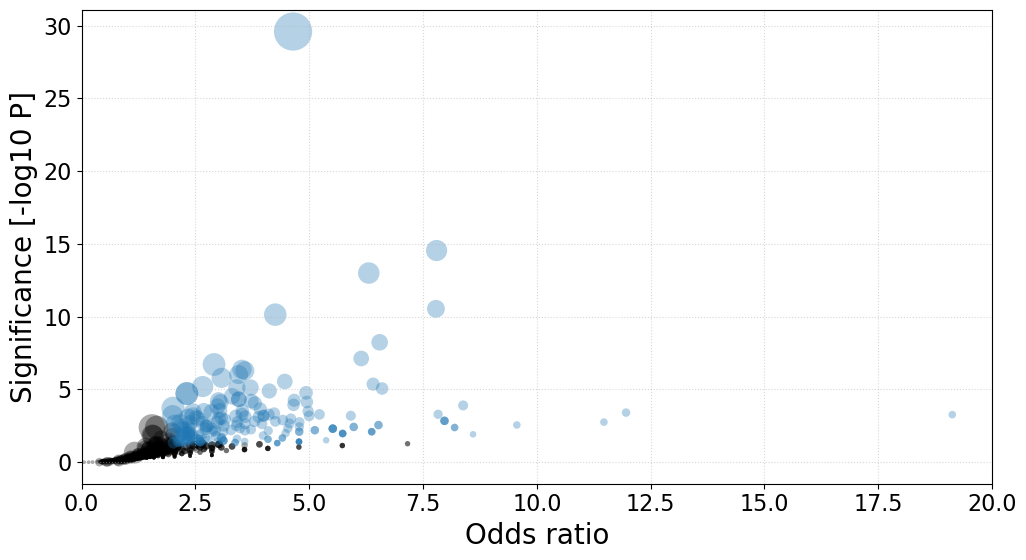

In [13]:
a = res_df[(res_df['pvalue'] > 0.05) | (res_df['odds_ratio'] < 2)]
print(a.shape)
x = a['odds_ratio']
y = -numpy.log10(a['pvalue'])
names = a['term']
s = a['n_overlap']
matplotlib.pyplot.scatter(x, y, s*7.5, alpha=1/3, edgecolors='none', color='black')

b = res_df[(res_df['pvalue'] < 0.05) & (res_df['odds_ratio'] > 2)]
print(b.shape)
x = b['odds_ratio']
y = -numpy.log10(b['pvalue'])
names = b['term']
s = b['n_overlap']
matplotlib.pyplot.scatter(x, y, s*7.5, alpha=1/3, edgecolors='none', color='tab:blue')

matplotlib.pyplot.xlim(0, 20)

matplotlib.pyplot.xlabel('Odds ratio')
matplotlib.pyplot.ylabel('Significance [-log10 P]')
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

(541, 6)
(125, 6)
1 8.77585151572359 WP4560 MFAP5 Effect On Permeability And Motility Of Endothelial Cells WP4560
2 12.165505641147073 WP5233 Arsenic Metabolism And Reactive Oxygen Species Generation WP5233
3 12.38089992023724 WP111 Electron Transport Chain OXPHOS System In Mitochondria WP111
4 8.01620475804757 WP4324 Mitochondrial Complex I Assembly Model OXPHOS System WP4324
5 8.18682962836469 WP4190 Mevalonate Arm Of Cholesterol Biosynthesis Pathway WP4190
6 11.615984153206 WP4860 Hijack Of Ubiquitination By SARS CoV 2 WP4860
7 8.118564476369405 WP4962 Airway Smooth Muscle Cell Contraction WP4962
8 9.07547426913061 WP4396 Nonalcoholic Fatty Liver Disease WP4396
9 14.333552633905224 WP477 Cytoplasmic Ribosomal Proteins WP477
10 9.70491330214907 WP5241 Mitochondrial Beta Oxidation WP5241
11 8.341569617195614 WP438 Non Homologous End Joining WP438
12 7.470753426518125 WP143 Fatty Acid Beta Oxidation WP143
13 9.0146940811588 WP623 Oxidative Phosphorylation WP623
14 8.341569617195614 WP5

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_7414/1903639276.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.loc[:, 'importance'] = importance


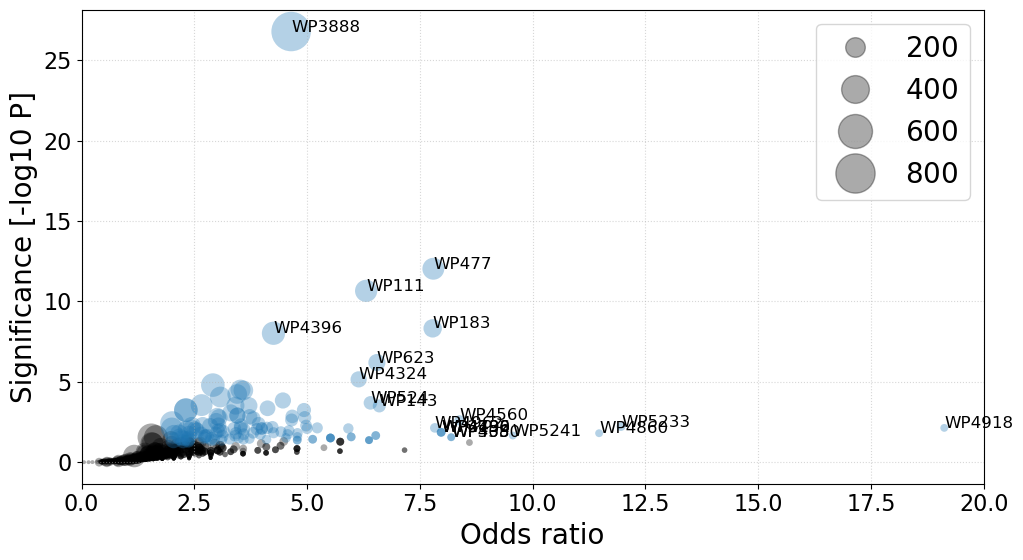

In [14]:
a = res_df[(res_df['adjusted'] > 0.05) | (res_df['odds_ratio'] < 2)]
print(a.shape)
x = a['odds_ratio']
y = -numpy.log10(a['adjusted'])
s = a['n_overlap']
matplotlib.pyplot.scatter(x, y, s*8, alpha=1/3, edgecolors='none', color='black')

b = res_df[(res_df['adjusted'] < 0.05) & (res_df['odds_ratio'] > 2)]
print(b.shape)
x = b['odds_ratio']
y = -numpy.log10(b['adjusted'])
s = b['n_overlap']
sc = matplotlib.pyplot.scatter(x, y, s*8, alpha=1/3, edgecolors='none', color='tab:blue')

x = list(b['odds_ratio'])
y = list(-numpy.log10(b['adjusted']))
prez = list(b['term'].values)
z = [element.split()[-1] for element in prez]
w = list(b['overlap_genes'].values)
importance = [numpy.sqrt(x[i]**2 + y[i]**2) for i in range(len(x))]
b.loc[:, 'importance'] = importance
c = b.sort_values('importance', ascending=False)

threshold = 7 # seven
count = 0
for i in range(len(x)):
    importance = numpy.sqrt(x[i]**2 + y[i]**2)
    if importance > threshold:
        matplotlib.pyplot.text(x[i], y[i], z[i], fontsize=12)
        count = count + 1
        print(count, importance, z[i], prez[i])

matplotlib.pyplot.legend(*sc.legend_elements("sizes", num=4))
matplotlib.pyplot.xlim(0, 20)
matplotlib.pyplot.xlabel('Odds ratio')
matplotlib.pyplot.ylabel('Significance [-log10 P]')
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [15]:
c.head()

,term,pvalue,odds_ratio,n_overlap,overlap_genes,adjusted,importance
520,VEGFA VEGFR2 Signaling WP3888,2.521282e-30,4.647016,101,"ACOT9, RPL27, ARPC5L, EWSR1, PRKAA1, FAM120A, ...",1.679174e-27,27.175177
541,Cellular Proteostasis WP4918,5.410617e-04,19.127680,4,"VBP1, PFDN1, PFDN2, PFDN6",7.354023e-03,19.246295
423,Cytoplasmic Ribosomal Proteins WP477,2.832363e-15,7.800021,31,"RPS8, RPL24, RPS6, RPL37A, RPL27, RPL13, RPL12...",9.431769e-13,14.333553
104,Electron Transport Chain OXPHOS System In Mito...,1.003597e-13,6.310286,32,"SDHC, UQCRQ, UQCR10, UQCR11, NDUFV2, UQCRB, CO...",2.227986e-11,12.380900
81,Arsenic Metabolism And Reactive Oxygen Species...,3.913761e-04,11.961717,5,"CAT, GSTO1, VDAC1, ATP1A1, SOD1",6.061779e-03,12.165506


In [16]:
print(c.shape)
c.drop('pvalue', axis='columns', inplace=True)
d = c.iloc[:, [0, 5, 4, 1, 2, 3]]
d.rename(columns={"term": "Term", 
                  "importance": "Priority", 
                  'adjusted':'Adjusted P', 
                  'odds_ratio':'Odds ratio',
                 'n_overlap':'N overlap',
                 'overlap_genes':'Overlap genes'}, inplace=True)
d.set_index('Term', inplace=True)
d.head()
d.to_csv('functional_analysis.tsv', sep='\t')

(125, 7)
